In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Create or load the results

## Run classification

In [3]:
# import json
# import pandas as pd
# import sys
# import os
# sys.path.append(os.getcwd() + '/src') # Add the 'src' directory to the system path to allow imports
# from request_classifier import RequestClassifierAgent, llm_config_35
# from utils import process_requests_and_log_to_excel, configure_logging
# from config import log_config

# # Load the dataset
# dataset_path = 'requests_dataset/requests_dataset.json'
# output_file = 'results/classification_results.xlsx'

# configure_logging(**log_config)
# # Initialize the classifier agent
# classifier_agent = RequestClassifierAgent(llm_config_35)

# # Process requests and log results to an Excel file
# process_requests_and_log_to_excel(dataset_path,classifier_agent, output_file)


flaml.automl is not available. Please install flaml[automl] to enable AutoML functionalities.


user (to guidance_labeler):


            Possible request types are: IMAGE_RETRIEVAL_BY_CAPTION, IMAGE_RETRIEVAL_BY_METADATA, GEOGRAPHY_QA, None.
            Label the USER_INPUT via the following instructions:

            The label must be a JSON of the format:
{
    "request_existence": bool,
    "explanation": str,
    "request_category": str
}

            USER_INPUT: Give me 20 images without vessels.
        

--------------------------------------------------------------------------------
guidance_labeler (to user):

{
    "request_existence": true,
    "explanation": "The user is requesting a specific type of images.",
    "request_category": "IMAGE_RETRIEVAL_BY_METADATA"
}

--------------------------------------------------------------------------------
user (to guidance_labeler):


            Possible request types are: IMAGE_RETRIEVAL_BY_CAPTION, IMAGE_RETRIEVAL_BY_METADATA, GEOGRAPHY_QA, None.
            Label the USER_INPUT via the following instructions:

            

## Load the data

In [4]:
data = pd.read_excel('results/classification_results.xlsx')
data['Expected Category'] = data['Expected Category'].astype(str)
data['Detected Category'] = data['Detected Category'].astype(str)

# Basic Classification Metrics

In [5]:
print("Classification Report:")
print(classification_report(data['Expected Category'], data['Detected Category'], zero_division=1))

Classification Report:
                             precision    recall  f1-score   support

           BINARY_VISUAL_QA       1.00      1.00      1.00        15
              GEOSPATIAL_QA       1.00      1.00      1.00        15
 IMAGE_RETRIEVAL_BY_CAPTION       0.91      0.67      0.77        15
   IMAGE_RETRIEVAL_BY_IMAGE       1.00      1.00      1.00        15
IMAGE_RETRIEVAL_BY_METADATA       0.87      0.87      0.87        15
         IMAGE_SEGMENTATION       1.00      1.00      1.00        15
            OBJECT_COUNTING       1.00      1.00      1.00        15
                        nan       0.00      1.00      0.00         0

                   accuracy                           0.93       105
                  macro avg       0.85      0.94      0.83       105
               weighted avg       0.97      0.93      0.95       105



# Confusion Matrix

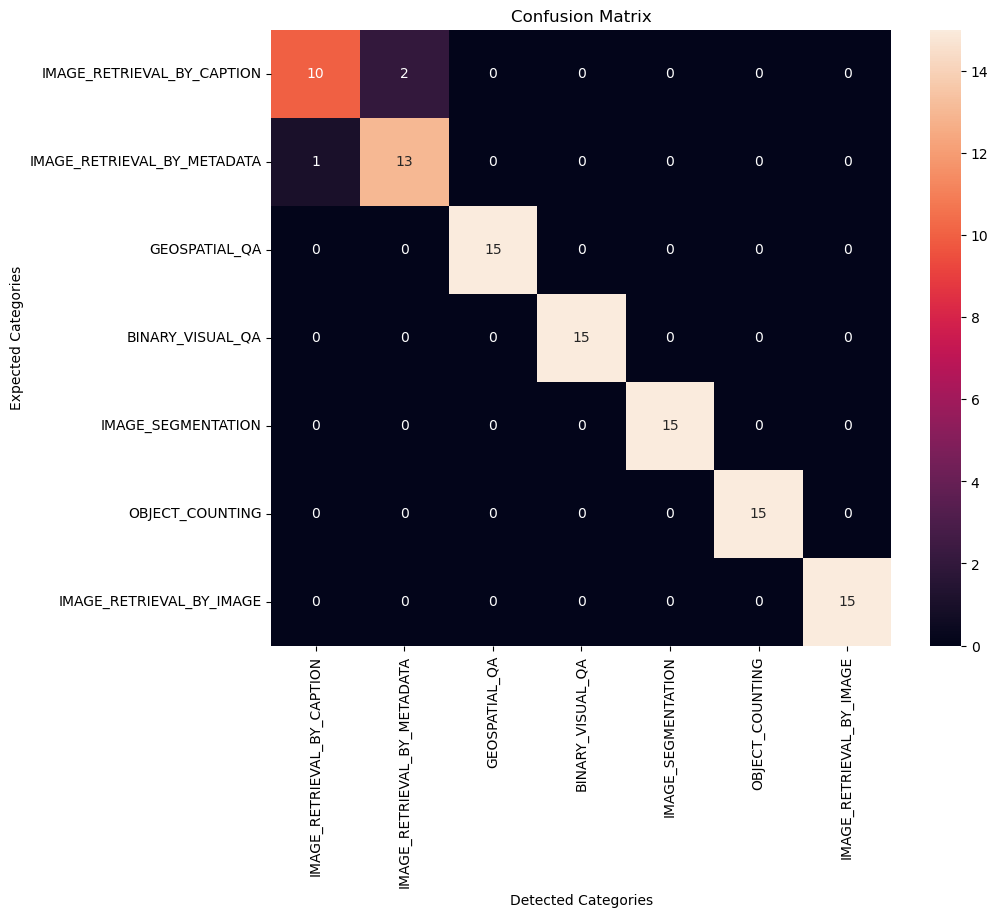

In [6]:
conf_matrix = confusion_matrix(data['Expected Category'], data['Detected Category'], labels=data['Expected Category'].unique())
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=data['Expected Category'].unique(), yticklabels=data['Expected Category'].unique())
ax.set_xlabel('Detected Categories')
ax.set_ylabel('Expected Categories')
ax.set_title('Confusion Matrix')
plt.show()

# Misclassified Examples Analysis

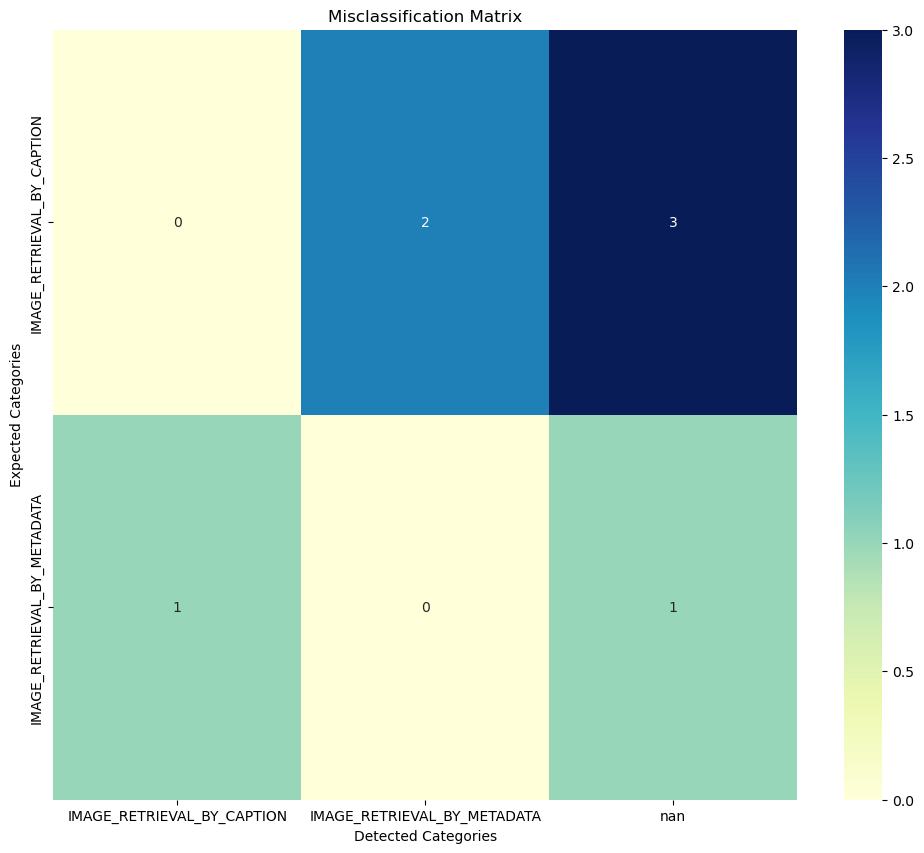

In [7]:
misclassified = data[data['Expected Category'] != data['Detected Category']]
misclassified_counts = misclassified.groupby(['Expected Category', 'Detected Category']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(misclassified_counts, annot=True, cmap="YlGnBu")
ax.set_xlabel('Detected Categories')
ax.set_ylabel('Expected Categories')
ax.set_title('Misclassification Matrix')
plt.show()